# **Лабораторная работа №3**
## **Бинарная классификация**
## **Вариант 6: Отток клиентов**

**Цель работы**: познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии).

Выполним анализ набора данных: "Отток клиентов". Набор данных содержит информацию о клиентах маркетингового агентства, включая их демографические характеристики, историю покупок и использование услуг компании. Данные предназначены для анализа оттока клиентов и выявления факторов, которые увеличивают вероятность того, что клиент перестанет пользоваться услугами агентства.

Набор данных включает следующие атрибуты:
*   Name – имя последнего контактного лица
*   Age – возраст клиента
*   Total Purchase – общее количество купленных объявлений
*   Account Manager – 0/1, назначен ли менеджер по работе с клиентами
*   Years – количество лет в качестве клиента
*   Num sites – количество веб-сайтов, которые использует клиент
в неделю, потраченных на физическую активность, в диапазоне от 0 до 10;
*   Onboard date – дата регистрации последнего контактного лица
алкоголя, потребляемых в неделю, в диапазоне от 0 до 5;
*   Location – адрес штаб-квартиры клиента
*   Company – название компании-клиента
*   Churn – ушел или нет (0/1)


## 1. Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("customer_churn.csv")
df.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [2]:
# Выведем уникальные значения и их частоту для целевой переменной
(unique, counts) = np.unique(df['Churn'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable:' , counts)


Unique values of the target variable:  [0 1]
Counts of the target variable: [750 150]


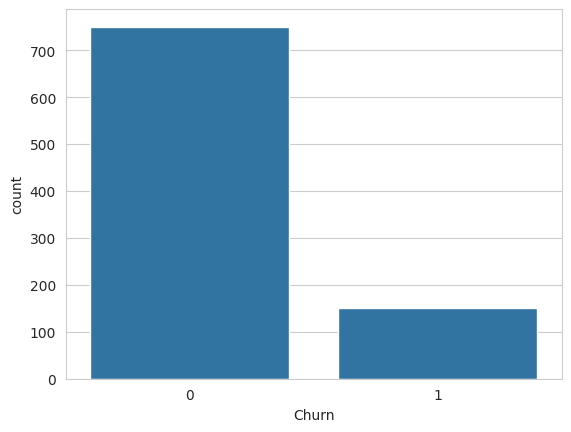

In [3]:
# Построим столбчатую диаграмму целевой переменной
sns.set_style("whitegrid")
sns.countplot(data=df, x='Churn')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


## Проверяем наличие пропущенных значений и выбросов

In [5]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64


<Axes: xlabel='Age'>

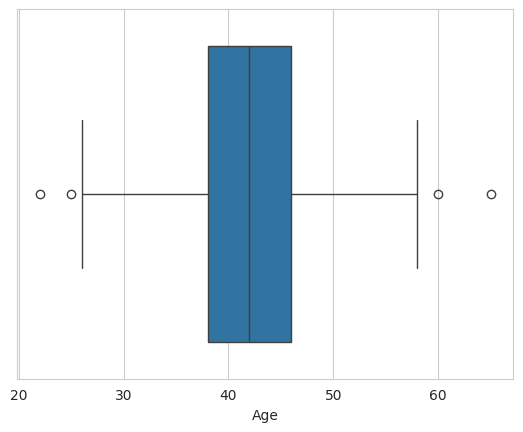

In [6]:
# проверяем на выбросы
sns.boxplot(x=df['Age'])

## Исключим невлияющие категориальные признаки

In [9]:
df_copy = df.copy()
cat_feat = ['Names', 'Location', 'Company', 'Onboard_date']
df_copy.drop(cat_feat, axis=1, inplace=True)
df_copy.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


## Разделяем данные на признаки и целевую переменную

In [11]:
# Целевая переменная
y = df_copy['Churn']
# Признаки
X = df_copy.drop('Churn', axis=1)
X.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,42.0,11066.80,0,7.22,8.0
1,41.0,11916.22,0,6.50,11.0
2,38.0,12884.75,0,6.67,12.0
3,42.0,8010.76,0,6.71,10.0
4,37.0,9191.58,0,5.56,9.0


## Применяем операцию нормализации для численной устойчивости

In [12]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[ 0.0299361 ,  0.41705373, -0.96290958,  1.52844634, -0.33323478],
       [-0.13335172,  0.76990459, -0.96290958,  0.96318219,  1.36758544],
       [-0.6232152 ,  1.172234  , -0.96290958,  1.09664734,  1.93452551],
       ...,
       [ 0.51979958,  0.82804427, -0.96290958,  0.14668954, -2.60099507],
       [ 1.49952654, -1.47255646,  1.03851911,  0.15454043,  0.80064537],
       [-0.45992738, -0.31039844,  1.03851911, -0.19874967,  0.80064537]])

## Разделяем данные на тренировочный и тестовый наборы

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

## Обучаем модель логистической регрессии

In [33]:
# Балансируем наш набор данных
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

## Делаем прогноз на основе данных тестирования

In [34]:
y_pred = model.predict(X_test)

## Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) =  27
False Positive(FP) =  25
True Negative(TN) =  169
False Negative(FN) =  4
Accuracy of the binary classification = 0.871


In [36]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8711111111111111


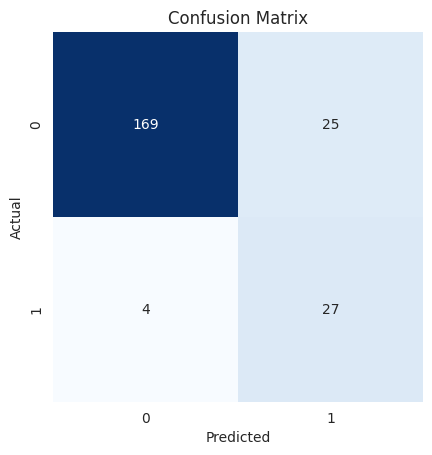

In [37]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.87


In [39]:
from sklearn.metrics import  precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")

Точность: 0.52
Полнота: 0.87


In [40]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.65


In [41]:
df_copy.corr()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


## Строим ROC-кривую

In [42]:
from sklearn.metrics import roc_curve, auc
# Получаем предсказанные вероятности класса 1 (Churn = 1)
y_score = model.predict_proba(X_test)[:, 1]
# Вычисляем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Площадь под ROC-кривой
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

AUC: 0.917


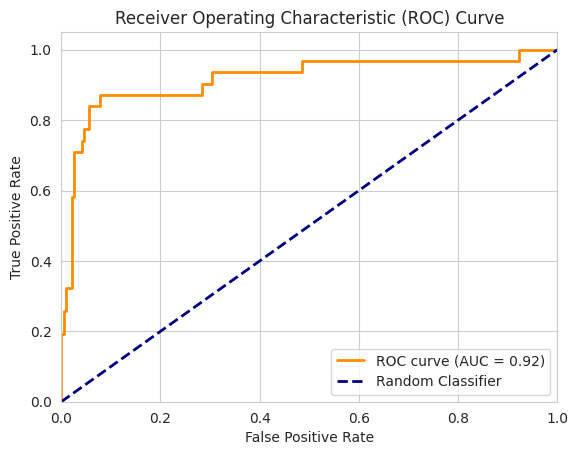

In [43]:
## Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()